In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ast import literal_eval
from collections import defaultdict
%matplotlib inline
import random
from sklearn.preprocessing import MinMaxScaler

In [5]:
def PreProcess(dataSet):
    dataSet = dataSet[['MultiLink','Product', 'Brand', 'Product_Rating', 'Seller','Price', 'FeedBack_Rating','Category',]]
    dataSet['Price'] = dataSet.groupby(['Product'], sort=False)['Price'].apply(lambda x: x.ffill().bfill())
    dataSet = dataSet[pd.notnull(dataSet['Seller'])]
    
    rate = dataSet['FeedBack_Rating']
    price = dataSet['Price']
    prating = dataSet['Product_Rating']
    
    x = rate.values
    y = price.values
    z = prating.values
    
    xpr = pd.Series(x).str.replace(' out of 5 stars', '', regex=True)
    dataSet['FeedBack_Rating'] = xpr
    
    zpr = pd.Series(z).str.replace(' out of 5 stars', '', regex=True)
    dataSet['Product_Rating'] = zpr
    
    pr2 = pd.Series(y).str.replace('Rs. ', '', regex=True)
    pr3 = pd.Series(pr2).str.replace(',', '', regex=True)
    dataSet['Price'] = pr3
    
    
    
    dataSet['Price'] = dataSet.groupby(['Product','Seller'], sort=False)['Price'].apply(lambda x: x.ffill().bfill())
    dataSet['FeedBack_Rating'] = dataSet['FeedBack_Rating'].astype(float)
    dataSet['FeedBack_Rating'] = dataSet.groupby(['Product','Seller'])['FeedBack_Rating'].transform(lambda x: x.fillna(x.mean()))
    
    dataSet['Product_Rating'] = dataSet['Product_Rating'].astype(float)
    dataSet['Product_Rating'] = dataSet.groupby(['Product','Seller'])['Product_Rating'].transform(lambda x: x.fillna(x.mean()))
    
    dataSet = dataSet[['MultiLink', 'Product', 'Brand', 'Seller', 'Price','FeedBack_Rating', 'Product_Rating']]
    
    dataSet = dataSet[pd.notnull(dataSet['MultiLink'])]
    dataSet = dataSet[pd.notnull(dataSet['Product'])]
    dataSet = dataSet[pd.notnull(dataSet['Brand'])]
    dataSet = dataSet[pd.notnull(dataSet['Seller'])]
    dataSet = dataSet[pd.notnull(dataSet['FeedBack_Rating'])]
    dataSet = dataSet[pd.notnull(dataSet['Product_Rating'])]
    
    return dataSet


In [6]:
finSet = pd.read_csv('D:/allstuff(1).csv')
finSet.columns
finSet = finSet.rename(columns={'ALinks':'MultiLink'})
finSet.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'MultiLink',
       'ALinks-href', 'Product', 'Product-href', 'Pagination',
       'Pagination-href', 'Brand', 'Product_Rating', 'Sellers', 'Sellers-href',
       'Seller', 'Seller-href', 'Price', 'FeedBack_Rating', 'OS', 'Android',
       'Category', 'Total_Ratings'],
      dtype='object')

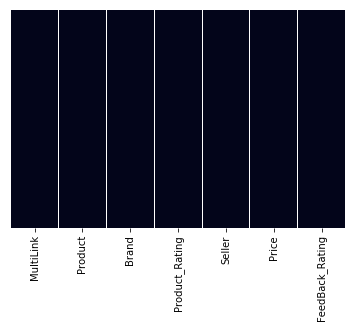

In [7]:
finSet = finSet[['MultiLink','Product', 'Brand', 'Product_Rating', 'Seller','Price', 'FeedBack_Rating']]
finSet['Price'] = finSet.groupby(['Product'], sort=False)['Price'].apply(lambda x: x.ffill().bfill())
finSet['Product_Rating'] = finSet.groupby(['Product'], sort=False)['Product_Rating'].apply(lambda x: x.ffill().bfill())
finSet['Seller'] = finSet.groupby(['Product'], sort=False)['Seller'].apply(lambda x: x.ffill().bfill())
finSet['FeedBack_Rating'] = finSet.groupby(['Product','Seller'], sort=False)['FeedBack_Rating'].apply(lambda x: x.ffill().bfill())

rate = finSet['FeedBack_Rating']
price = finSet['Price']
prating = finSet['Product_Rating']
    
x = rate.values
y = price.values
z = prating.values
    
xpr = pd.Series(x).str.replace(' out of 5 stars', '', regex=True)
finSet['FeedBack_Rating'] = xpr
    
zpr = pd.Series(z).str.replace(' out of 5 stars', '', regex=True)
finSet['Product_Rating'] = zpr
    
pr2 = pd.Series(y).str.replace('Rs. ', '', regex=True)
pr3 = pd.Series(pr2).str.replace(',', '', regex=True)
finSet['Price'] = pr3

finSet = finSet[pd.notnull(finSet['MultiLink'])]
finSet = finSet[pd.notnull(finSet['Product'])]
finSet = finSet[pd.notnull(finSet['Brand'])]
finSet = finSet[pd.notnull(finSet['Seller'])]
finSet = finSet[pd.notnull(finSet['FeedBack_Rating'])]
finSet = finSet[pd.notnull(finSet['Product_Rating'])]
    
sns.heatmap(finSet.isnull(),yticklabels=False,cbar=False)

In [8]:
finSet.shape

(62689, 7)

In [9]:
abc = pd.read_csv('D:/DST/FinalData.csv')
abc = abc[['MultiLink', 'Product', 'Brand', 'Seller','Price', 'FeedBack_Rating', 'Product_Rating', 'Packaging_Rating','Courier_Rating']]
finSet['Courier_Rating'] = finSet[['FeedBack_Rating', 'Product_Rating']].max(axis=1)
df = finSet[['FeedBack_Rating', 'Product_Rating','Courier_Rating']]
finSet['Packaging_Rating'] = df.mean(axis=1)
finSet = finSet[['MultiLink', 'Product', 'Brand', 'Seller','Price', 'FeedBack_Rating', 'Product_Rating', 'Packaging_Rating','Courier_Rating']]

In [10]:
final = pd.concat([finSet,abc]).reset_index(drop=True)

In [11]:
final = final.drop_duplicates()
final = final.reset_index(drop=True)

In [12]:
final.to_csv('D:/DST/FinalData.csv')

In [13]:
final

,MultiLink,Product,Brand,Seller,Price,FeedBack_Rating,Product_Rating,Packaging_Rating,Courier_Rating
0,Video Games Deals,Doom (PS4),Bethesda,Game Addicts,999.00,1,4.4,4.400000,4.400000
1,Headphones,Boat BassHeads 100 Hawk Inspired Earphones wit...,Boat,Techretailer,589.00,5,4.0,5.000000,5.000000
2,Drives & Storage,Sandisk 16GB Ultra Microsdhc (Microsd) Memory ...,SanDisk,Cell Express,280.00,5,4.3,5.000000,5.000000
3,Components,Generic Uno R3 ATmega328P with USB Cable lengt...,Generic,Cloudtail India,500.00,5,4.1,5.000000,5.000000
4,Janitorial & Sanitation Supplies,Sterillium Hand Sanitizer - 500 ml (Blue),Sterillium,city medical,340.00,5,4.4,5.000000,5.000000
5,Monitors,Samsung 27 inch (68.6 cm) Curved Bezel Less LE...,Samsung,The-EStore,18921.00,5,4.5,5.000000,5.000000
6,Monitors,BenQ 23.8 inch (60.4 cm) Thin Bezel LED Backli...,BenQ,Appario Retail Private Ltd,23169.00,5,4.2,5.000000,5.000000
7,Refrigerators,Samsung 253 L 2 Star Frost Free Double Door Re...,Samsung,Cloudtail India,19590.00,5,4.1,5.000000,5.000000
8,Office Supplies & Stationery,HP 803 Black Original Ink Cartridge,HP,Original cartridge store,1199.00,5,3.6,5.000000,5.000000
9,Components,Kingston SSDNow A400 240GB SATA 3 Solid State ...,Kingston,best_buyaxz,2749.00,5,4.6,5.000000,5.000000
